In [1]:
!python -m pip install --user --upgrade pip
!pip install --user keras
!pip install --user tensorflow
!pip install --user -U numpy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
Successfully built termcolor gast absl-py


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [14]:
import pandas as pd
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Cleaned_withoutNaN.csv')
df.drop(['Unnamed: 0', 'The Date of this Price', 'Expiration Date of the Option'], axis = 1, inplace = True)

In [3]:
df.head()

,Strike Price,Lowest Closing Ask Across All Exchanges,Open Interest for the Option,Implied Volatility of the Option,Underlying Price,maturity,"C=Call, P=Put_C","C=Call, P=Put_P"
0,590.0,85.50,113,0.636391,674.97,3,1,0
1,610.0,65.45,8,0.495483,674.97,3,1,0
2,615.0,60.25,25,0.408294,674.97,3,1,0
3,620.0,55.25,43,0.376411,674.97,3,1,0
4,625.0,50.25,90,0.363375,674.97,3,1,0


In [4]:
y = df['Lowest  Closing Ask Across All Exchanges'].values
df.drop(['Lowest  Closing Ask Across All Exchanges'], axis = 1, inplace = True)

In [5]:
sc= preprocessing.MinMaxScaler()
X= sc.fit_transform(df)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)

(487123, 7)
(487123, 1)


In [8]:
#XX_train, XX_validation, yy_train, yy_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])

In [9]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=50)

In [20]:
# Because it is a simple regression problem, we should custom metrics function
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis = -1))

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [24]:
model.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)

In [25]:
result = model.fit(X_train, 
                   y_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(X_test, y_test),
                   callbacks = [es]
                  )

Train on 487123 samples, validate on 239927 samples
Epoch 1/200
487123/487123 [==============================] - 3s 6us/step - loss: 4.0678e-04 - rmse: 0.0071 - r_square: 0.9837 - val_loss: 4.5071e-05 - val_rmse: 0.0055 - val_r_square: 0.9981
Epoch 2/200
487123/487123 [==============================] - 3s 6us/step - loss: 2.2304e-05 - rmse: 0.0033 - r_square: 0.9991 - val_loss: 1.3144e-05 - val_rmse: 0.0027 - val_r_square: 0.9995
Epoch 3/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.3775e-05 - rmse: 0.0027 - r_square: 0.9994 - val_loss: 6.4453e-06 - val_rmse: 0.0018 - val_r_square: 0.9997
Epoch 4/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.0806e-05 - rmse: 0.0024 - r_square: 0.9996 - val_loss: 1.6285e-05 - val_rmse: 0.0031 - val_r_square: 0.9993
Epoch 5/200
487123/487123 [==============================] - 3s 6us/step - loss: 9.3118e-06 - rmse: 0.0022 - r_square: 0.9996 - val_loss: 3.5536e-05 - val_rmse: 0.0051 - val_r_square: 

Epoch 43/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.5734e-06 - rmse: 8.3073e-04 - r_square: 0.9999 - val_loss: 1.1982e-06 - val_rmse: 7.3854e-04 - val_r_square: 1.0000
Epoch 44/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.6206e-06 - rmse: 8.5349e-04 - r_square: 0.9999 - val_loss: 1.0280e-06 - val_rmse: 6.8463e-04 - val_r_square: 1.0000
Epoch 45/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.5943e-06 - rmse: 8.3501e-04 - r_square: 0.9999 - val_loss: 1.2610e-06 - val_rmse: 7.2008e-04 - val_r_square: 0.9999
Epoch 46/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.5888e-06 - rmse: 8.3654e-04 - r_square: 0.9999 - val_loss: 9.6865e-07 - val_rmse: 6.6191e-04 - val_r_square: 1.0000
Epoch 47/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.4921e-06 - rmse: 8.1755e-04 - r_square: 0.9999 - val_loss: 2.3234e-06 - val_rmse: 0.0010 - val_r_square: 0.9999
Epoc

487123/487123 [==============================] - 3s 6us/step - loss: 1.2547e-06 - rmse: 7.3778e-04 - r_square: 0.9999 - val_loss: 1.1030e-06 - val_rmse: 6.5902e-04 - val_r_square: 1.0000
Epoch 85/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.2117e-06 - rmse: 7.2064e-04 - r_square: 1.0000 - val_loss: 9.7093e-07 - val_rmse: 6.9812e-04 - val_r_square: 1.0000
Epoch 86/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.2245e-06 - rmse: 7.2137e-04 - r_square: 0.9999 - val_loss: 1.0060e-06 - val_rmse: 6.1441e-04 - val_r_square: 1.0000
Epoch 87/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.1816e-06 - rmse: 7.1366e-04 - r_square: 1.0000 - val_loss: 1.7472e-06 - val_rmse: 8.8344e-04 - val_r_square: 0.9999
Epoch 88/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.1820e-06 - rmse: 7.1407e-04 - r_square: 1.0000 - val_loss: 1.1916e-06 - val_rmse: 7.4992e-04 - val_r_square: 1.0000
Epoch 89/200


Epoch 125/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.1176e-06 - rmse: 6.8161e-04 - r_square: 1.0000 - val_loss: 7.6701e-07 - val_rmse: 5.7751e-04 - val_r_square: 1.0000
Epoch 126/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.0219e-06 - rmse: 6.5877e-04 - r_square: 1.0000 - val_loss: 8.1958e-07 - val_rmse: 6.0928e-04 - val_r_square: 1.0000
Epoch 127/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.1095e-06 - rmse: 6.8440e-04 - r_square: 1.0000 - val_loss: 8.6640e-07 - val_rmse: 5.7188e-04 - val_r_square: 1.0000
Epoch 128/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.0692e-06 - rmse: 6.7209e-04 - r_square: 1.0000 - val_loss: 8.6512e-07 - val_rmse: 5.9959e-04 - val_r_square: 1.0000
Epoch 129/200
487123/487123 [==============================] - 3s 6us/step - loss: 1.0507e-06 - rmse: 6.5925e-04 - r_square: 1.0000 - val_loss: 1.0300e-06 - val_rmse: 6.3982e-04 - val_r_square: 1.

Epoch 166/200
487123/487123 [==============================] - 3s 6us/step - loss: 9.7504e-07 - rmse: 6.3856e-04 - r_square: 1.0000 - val_loss: 8.5933e-07 - val_rmse: 6.2794e-04 - val_r_square: 1.0000
Epoch 167/200
487123/487123 [==============================] - 3s 6us/step - loss: 9.4290e-07 - rmse: 6.2542e-04 - r_square: 1.0000 - val_loss: 6.8390e-07 - val_rmse: 5.4881e-04 - val_r_square: 1.0000
Epoch 168/200
487123/487123 [==============================] - 3s 6us/step - loss: 9.6348e-07 - rmse: 6.3295e-04 - r_square: 1.0000 - val_loss: 8.7329e-07 - val_rmse: 5.9684e-04 - val_r_square: 1.0000
Epoch 169/200
487123/487123 [==============================] - 3s 6us/step - loss: 9.6115e-07 - rmse: 6.3060e-04 - r_square: 1.0000 - val_loss: 1.1565e-06 - val_rmse: 6.9624e-04 - val_r_square: 1.0000
Epoch 170/200
487123/487123 [==============================] - 3s 6us/step - loss: 9.6600e-07 - rmse: 6.3447e-04 - r_square: 1.0000 - val_loss: 8.6323e-07 - val_rmse: 5.8660e-04 - val_r_square: 1.

In [24]:
model.save_weights('model.h5')

In [26]:
predictions = model.predict(X_test)
print(predictions[:10])

[[4.5010909e-02]
 [3.7402275e-01]
 [1.3039058e-01]
 [4.9441393e-02]
 [3.2044992e-02]
 [1.8091969e-02]
 [5.7085192e-01]
 [1.3830094e-04]
 [1.2175827e-03]
 [1.9953635e-01]]


In [67]:
y_test[:10]

array([[4.29719291e-02],
       [3.73104071e-01],
       [1.29315320e-01],
       [5.07406147e-02],
       [3.17998195e-02],
       [1.70023232e-02],
       [5.70946596e-01],
       [4.43924888e-05],
       [9.76634753e-04],
       [1.98123677e-01]])

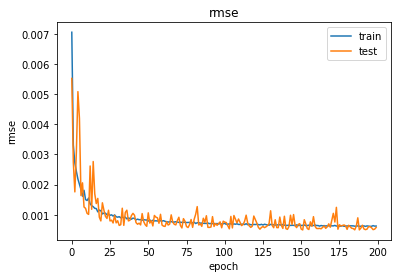

In [31]:
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

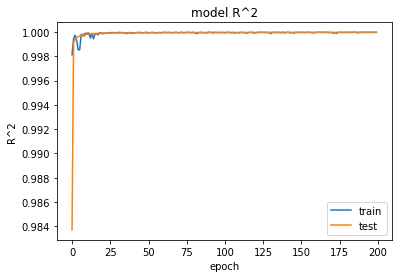

In [30]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(result.history['val_r_square'])
plt.plot(result.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

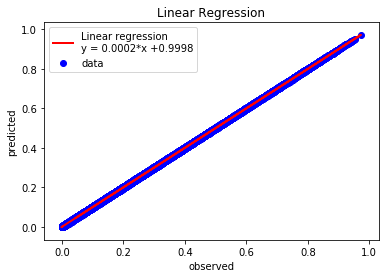

In [28]:
# print the linear regression and display datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(y_test.reshape(-1,1), predictions)  
y_fit = regressor.predict(predictions) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(y_test, predictions, color='blue', label= 'data')
plt.plot(predictions, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [32]:
import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_test,predictions))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_test,predictions))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,predictions)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y_test,predictions))



Mean absolute error (MAE):      0.000577
Mean squared error (MSE):       0.000001
Root mean squared error (RMSE): 0.000854
R square (R^2):                 0.999970
